In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X=df[['Fare','Age']]

In [5]:
X

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,NaN
889,30.0000,26.0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()

In [8]:
X=sc.fit_transform(X)

In [9]:
x=pd.DataFrame(X,columns=['Age','Fare'])

In [10]:
x.head()

,Age,Fare
0,-0.502445,-0.530377
1,0.786845,0.571831
2,-0.488854,-0.254825
3,0.420730,0.365167
4,-0.486337,0.365167


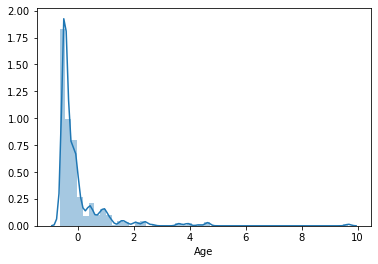

In [11]:
sns.distplot(x['Age'],bins=50)

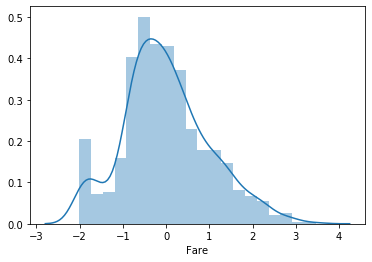

In [12]:
sns.distplot(x['Fare'],bins=20)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mn=MinMaxScaler()

In [15]:
X_minmax=mn.fit_transform(df[['Age','Fare']])

In [16]:
X_minmax=pd.DataFrame(X,columns=['Age','Fare'])

In [17]:
X_minmax

,Age,Fare
0,-0.502445,-0.530377
1,0.786845,0.571831
2,-0.488854,-0.254825
3,0.420730,0.365167
4,-0.486337,0.365167
...,...,...
886,-0.386671,-0.185937
887,-0.044381,-0.737041
888,-0.176263,NaN
889,-0.044381,-0.254825


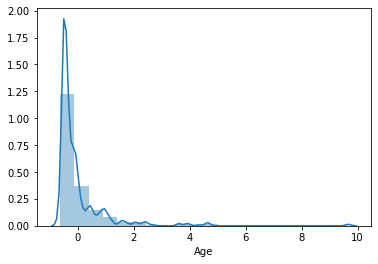

In [18]:
sns.distplot(X_minmax['Age'],bins=20)

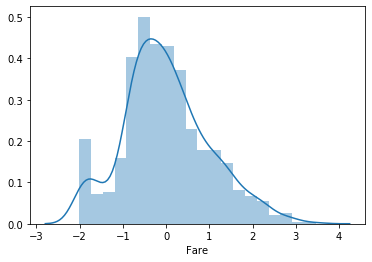

In [19]:
sns.distplot(X_minmax['Fare'],bins=20)

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
rs=RobustScaler()

In [22]:
X=rs.fit_transform(df[['Age','Fare']])

In [23]:
X=pd.DataFrame(X,columns=['Age','Fare'])

In [24]:
X

,Age,Fare
0,-0.335664,-0.312011
1,0.559441,2.461242
2,-0.111888,-0.282777
3,0.391608,1.673732
4,0.391608,-0.277363
...,...,...
886,-0.055944,-0.062981
887,-0.503497,0.673281
888,NaN,0.389604
889,-0.111888,0.673281


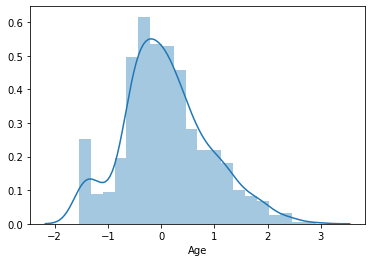

In [25]:
sns.distplot(X['Age'],bins=20)

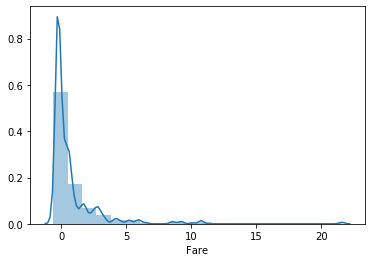

In [26]:
sns.distplot(X['Fare'],bins=20)

In [27]:
import scipy.stats as stat
import pylab

In [28]:
def plt_method(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

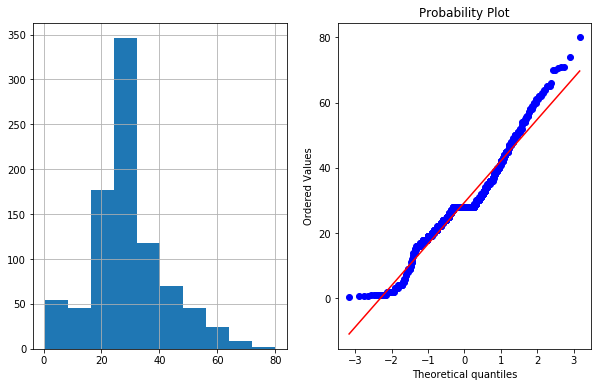

In [45]:
plt_method(df,'Age')

In [46]:
df['Age_log']=np.log(df['Age'])

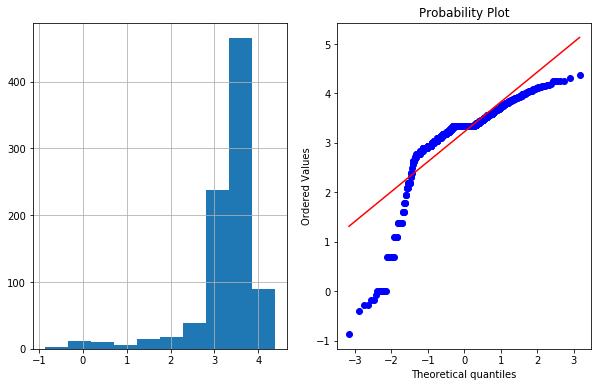

In [47]:
plt_method(df,'Age_log')

In [48]:
df['Age_root']=df['Age']**(1/2)

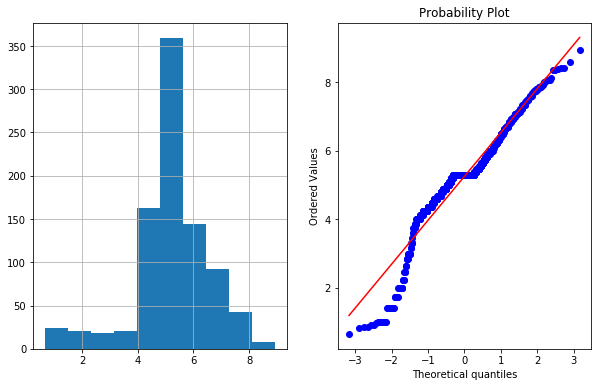

In [49]:
plt_method(df,'Age_root')

In [50]:
df['Age_exp']=df['Age']**(1/1.2)

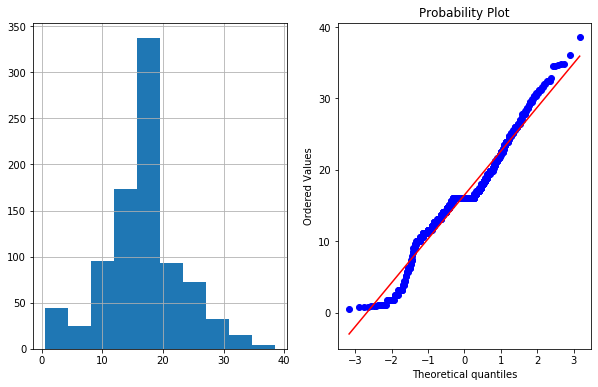

In [51]:
plt_method(df,'Age_exp')

In [52]:
df['Age_boxcox'],paramters=stat.boxcox(df['Age'])

In [53]:
paramters

0.7964531473656952

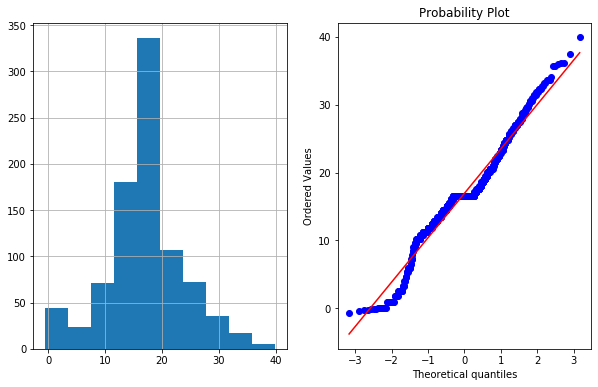

In [54]:
plt_method(df,'Age_boxcox')

In [41]:
df['Age'].isnull().sum()

177

In [43]:
df['Age'].fillna(df['Age'].median(),inplace=True)